In [1]:
import scipy as sp
from scipy import stats
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
exec(open('../settings.py').read(), globals())

/home/fabian/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
store = pd.HDFStore('./lg_model_plot_data.hdf')

In [3]:
full_title = {'full': 'Full model',
              'basal_div': 'No acceleration',
              'nodiv': 'No division',
              'noact': 'No activation',
              'noflux': 'No influx',
              'noflux_noact': 'Only divisions'}

Plot full model

In [4]:
scale_growth = 1.0 / 1000.0

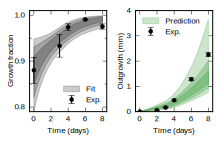

In [5]:
time = sp.array(store['time'])
gexpdata = store['gexpdata']
outgrowth_pop = store['outgrowth_pop']

condition = 'full'
  
fig, ax = plt.subplots(1, 2, sharex = True, figsize = (80.0/25.4, 52.0/25.4))
# fig.suptitle(full_title[condition], fontsize = 8)

# experimental data
ax[1].errorbar(sp.array(outgrowth_pop['time']), scale_growth * sp.array(outgrowth_pop['mean']),
               scale_growth * sp.array(outgrowth_pop['sem']),
               label = 'Exp.', fmt = 'o', color = 'black')

ax[0].errorbar(gexpdata['time'], gexpdata['G', 'mean'], gexpdata['G', 'sem'], fmt='o', color = 'black', label = 'Exp.')

# best prediction

L = store['best_fit_{}'.format(condition)]['L']
G = store['best_fit_{}'.format(condition)]['G']

if condition == 'full':
    Glabel = 'fit'
else:
    Glabel = 'prediction'

# ax[1].plot(time, scale_growth * L, lw = 2, color = 'black', label = 'prediction')
# ax[0].plot(time, G,                  lw = 2, color = 'black', label = Glabel)

# 3-sigma confidence interval
L_3sigma_max = store['L_3sigma_max_{0}'.format(condition)]
L_3sigma_min = store['L_3sigma_min_{0}'.format(condition)]
ax[1].fill_between(time, scale_growth * L_3sigma_min, scale_growth * L_3sigma_max, alpha = 0.2, color = 'green', label = 'Prediction')

G_3sigma_max = store['G_3sigma_max_{0}'.format(condition)]
G_3sigma_min = store['G_3sigma_min_{0}'.format(condition)]
ax[0].fill_between(time, G_3sigma_min, G_3sigma_max, alpha = 0.2, color = 'black', label = 'Fit')

# 2sigma confidence interval
L_2sigma_max = store['L_2sigma_max_{0}'.format(condition)]
L_2sigma_min = store['L_2sigma_min_{0}'.format(condition)]
ax[1].fill_between(time, scale_growth * L_2sigma_min, scale_growth * L_2sigma_max, alpha = 0.2, color = 'green')

G_2sigma_max = store['G_2sigma_max_{0}'.format(condition)]
G_2sigma_min = store['G_2sigma_min_{0}'.format(condition)]
ax[0].fill_between(time, G_2sigma_min, G_2sigma_max, alpha = 0.2, color = 'black')

# 1sigma confidence interval
L_1sigma_max = store['L_1sigma_max_{0}'.format(condition)]
L_1sigma_min = store['L_1sigma_min_{0}'.format(condition)]
ax[1].fill_between(time, scale_growth * L_1sigma_min, scale_growth * L_1sigma_max, alpha = 0.2, color = 'green')

G_1sigma_max = store['G_1sigma_max_{0}'.format(condition)]
G_1sigma_min = store['G_1sigma_min_{0}'.format(condition)]
ax[0].fill_between(time, G_1sigma_min, G_1sigma_max, alpha = 0.2, color = 'black')

# formatting
fig.patch.set_alpha(1.0)

ax[1].legend(loc = 'upper left', frameon = False, numpoints = 1)
#     ax[1].plot([0.6, 2.45], 2 * [3.37], color = 'black')
ax[1].set_xlim(-0.5, 8.5)
ax[1].set_ylim(0.0, 4.0)
ax[1].set_yticks([0, 1, 2, 3, 4])

ax[0].legend(loc = (0.4, 0.05), frameon = False, numpoints = 1)
ax[0].set_yticks(sp.arange(0.7, 1.01, 0.1))
ax[0].set_yticks(sp.arange(0.75, 1.06, 0.1), minor = True)
ax[0].set_ylim(0.79, 1.01)

#     ax[1].get_yaxis().set_label_coords(-0.3, 0.5)
#     ax[0].get_yaxis().set_label_coords(-0.3, 0.5)


ax[0].set_xlabel('Time (days)')
ax[1].set_xlabel('Time (days)')
ax[1].set_ylabel('Outgrowth (mm)')
ax[0].set_ylabel('Growth fraction')
plt.tight_layout()
plt.savefig('../../figure_plots/lg_model_{}.svg'.format(condition))

plt.show()

Full model without data

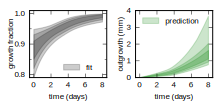

In [6]:
time = sp.array(store['time'])
gexpdata = store['gexpdata']
outgrowth_pop = store['outgrowth_pop']

condition = 'full'
  
fig, ax = plt.subplots(1, 2, sharex = True, figsize = (80.0/25.4, 40.0/25.4))
# fig.suptitle(full_title[condition], fontsize = 8)

# experimental data
# ax[1].errorbar(sp.array(outgrowth_pop['time']), scale_growth * sp.array(outgrowth_pop['mean']),
#                scale_growth * sp.array(outgrowth_pop['sem']),
#                label = 'data', fmt = 'o', color = 'black')

# ax[0].errorbar(gexpdata['time'], gexpdata['G', 'mean'], gexpdata['G', 'sem'], fmt='o', color = 'black', label = 'data')

# best prediction

L = store['best_fit_{}'.format(condition)]['L']
G = store['best_fit_{}'.format(condition)]['G']

if condition == 'full':
    Glabel = 'fit'
else:
    Glabel = 'prediction'

# ax[1].plot(time, scale_growth * L, lw = 2, color = 'black', label = 'prediction')
# ax[0].plot(time, G,                  lw = 2, color = 'black', label = Glabel)

# 3-sigma confidence interval
L_3sigma_max = store['L_3sigma_max_{0}'.format(condition)]
L_3sigma_min = store['L_3sigma_min_{0}'.format(condition)]
ax[1].fill_between(time, scale_growth * L_3sigma_min, scale_growth * L_3sigma_max, alpha = 0.2, color = 'green', label = 'prediction')

G_3sigma_max = store['G_3sigma_max_{0}'.format(condition)]
G_3sigma_min = store['G_3sigma_min_{0}'.format(condition)]
ax[0].fill_between(time, G_3sigma_min, G_3sigma_max, alpha = 0.2, color = 'black', label = 'fit')

# 2sigma confidence interval
L_2sigma_max = store['L_2sigma_max_{0}'.format(condition)]
L_2sigma_min = store['L_2sigma_min_{0}'.format(condition)]
ax[1].fill_between(time, scale_growth * L_2sigma_min, scale_growth * L_2sigma_max, alpha = 0.2, color = 'green')

G_2sigma_max = store['G_2sigma_max_{0}'.format(condition)]
G_2sigma_min = store['G_2sigma_min_{0}'.format(condition)]
ax[0].fill_between(time, G_2sigma_min, G_2sigma_max, alpha = 0.2, color = 'black')

# 1sigma confidence interval
L_1sigma_max = store['L_1sigma_max_{0}'.format(condition)]
L_1sigma_min = store['L_1sigma_min_{0}'.format(condition)]
ax[1].fill_between(time, scale_growth * L_1sigma_min, scale_growth * L_1sigma_max, alpha = 0.2, color = 'green')

G_1sigma_max = store['G_1sigma_max_{0}'.format(condition)]
G_1sigma_min = store['G_1sigma_min_{0}'.format(condition)]
ax[0].fill_between(time, G_1sigma_min, G_1sigma_max, alpha = 0.2, color = 'black')

# formatting
fig.patch.set_alpha(1.0)

ax[1].legend(loc = 'upper left', frameon = False, numpoints = 1)
#     ax[1].plot([0.6, 2.45], 2 * [3.37], color = 'black')
ax[1].set_xlim(-0.5, 8.5)
ax[1].set_ylim(0.0, 4.0)
ax[1].set_yticks([0, 1, 2, 3, 4])

ax[0].legend(loc = (0.4, 0.05), frameon = False, numpoints = 1)
ax[0].set_yticks(sp.arange(0.7, 1.01, 0.1))
ax[0].set_yticks(sp.arange(0.75, 1.06, 0.1), minor = True)
ax[0].set_ylim(0.79, 1.01)

#     ax[1].get_yaxis().set_label_coords(-0.3, 0.5)
#     ax[0].get_yaxis().set_label_coords(-0.3, 0.5)


ax[0].set_xlabel('time (days)')
ax[1].set_xlabel('time (days)')
ax[1].set_ylabel('outgrowth (mm)')
ax[0].set_ylabel('growth fraction')
plt.tight_layout()
plt.savefig('../../figure_plots/lg_model_without_data_{}.svg'.format(condition))

plt.show()

Plot scenarios

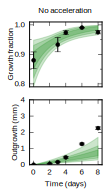

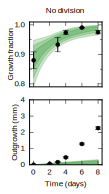

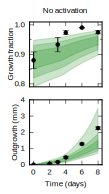

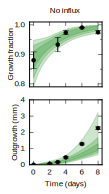

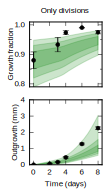

In [7]:
time = sp.array(store['time'])
gexpdata = store['gexpdata']
outgrowth_pop = store['outgrowth_pop']
conditions = list(store['conditions'])
conditions.remove('full')


for condition in conditions:

  
    fig, ax = plt.subplots(2, sharex = True, figsize = (33.0/25.4, 65.0/25.4))
    fig.suptitle(full_title[condition], fontsize = 8)

    # experimental data
    ax[1].errorbar(sp.array(outgrowth_pop['time']), scale_growth * sp.array(outgrowth_pop['mean']),
                   scale_growth * sp.array(outgrowth_pop['sem']),
                   label = '_data', fmt = 'o', color = 'black')
    
    ax[0].errorbar(gexpdata['time'], gexpdata['G', 'mean'], gexpdata['G', 'sem'], fmt='o', color = 'black', label = '_data')
    
#     # best prediction
    
#     L = store['best_fit_{}'.format(condition)]['L']
#     G = store['best_fit_{}'.format(condition)]['G']
    
#     if condition == 'full':
#         Glabel = 'fit'
#     else:
#         Glabel = 'prediction'
        
#     ax[1].plot(time, scale_growth * L, lw = 2, color = 'black', label = 'prediction')
#     ax[0].plot(time, G,                  lw = 2, color = 'black', label = Glabel)
        
    # 3-sigma confidence interval
    L_3sigma_max = store['L_3sigma_max_{0}'.format(condition)]
    L_3sigma_min = store['L_3sigma_min_{0}'.format(condition)]
    ax[1].fill_between(time, scale_growth * L_3sigma_min, scale_growth * L_3sigma_max, alpha = 0.2, color = 'green')
    
    G_3sigma_max = store['G_3sigma_max_{0}'.format(condition)]
    G_3sigma_min = store['G_3sigma_min_{0}'.format(condition)]
    ax[0].fill_between(time, G_3sigma_min, G_3sigma_max, alpha = 0.2, color = 'green')
    
    # 2sigma confidence interval
    L_2sigma_max = store['L_2sigma_max_{0}'.format(condition)]
    L_2sigma_min = store['L_2sigma_min_{0}'.format(condition)]
    ax[1].fill_between(time, scale_growth * L_2sigma_min, scale_growth * L_2sigma_max, alpha = 0.2, color = 'green')
    
    G_2sigma_max = store['G_2sigma_max_{0}'.format(condition)]
    G_2sigma_min = store['G_2sigma_min_{0}'.format(condition)]
    ax[0].fill_between(time, G_2sigma_min, G_2sigma_max, alpha = 0.2, color = 'green')
    
    # 1sigma confidence interval
    L_1sigma_max = store['L_1sigma_max_{0}'.format(condition)]
    L_1sigma_min = store['L_1sigma_min_{0}'.format(condition)]
    ax[1].fill_between(time, scale_growth * L_1sigma_min, scale_growth * L_1sigma_max, alpha = 0.2, color = 'green')
    
    G_1sigma_max = store['G_1sigma_max_{0}'.format(condition)]
    G_1sigma_min = store['G_1sigma_min_{0}'.format(condition)]
    ax[0].fill_between(time, G_1sigma_min, G_1sigma_max, alpha = 0.2, color = 'green')
    
    # formatting
    fig.patch.set_alpha(1.0)
    
#     ax[1].legend(loc = 'best', frameon = False, numpoints = 1)
#     ax[1].plot([0.6, 2.45], 2 * [3.37], color = 'black')
    ax[1].set_xlim(-0.5, 8.5)
    ax[1].set_ylim(0.0, 4.0)
    ax[1].set_yticks([0, 1, 2, 3, 4])
    
#     ax[0].legend(loc = (0.15,0.05), frameon = False, numpoints = 1)
    ax[0].set_yticks(sp.arange(0.7, 1.01, 0.1))
    ax[0].set_yticks(sp.arange(0.75, 1.06, 0.1), minor = True)
    ax[0].set_ylim(0.79, 1.01)
    
#     ax[1].get_yaxis().set_label_coords(-0.3, 0.5)
#     ax[0].get_yaxis().set_label_coords(-0.3, 0.5)
    
   
    ax[1].set_xlabel('Time (days)')
    ax[1].set_ylabel('Outgrowth (mm)')
    ax[0].set_ylabel('Growth fraction')
    
    plt.savefig('../../figure_plots/lg_model_{}.svg'.format(condition))

    plt.show()

Maximum outgrowth of the no acceleration scenario (number used in the results)

In [8]:
store['L_3sigma_max_basal_div'][8] / 1000.0

1.6916068061672069

## Compare with Schnapp et al., 2005
Schnapp, Esther, Martin Kragl, Lee Rubin, and Elly M. Tanaka. “Hedgehog Signaling Controls Dorsoventral Patterning, Blastema Cell Proliferation and Cartilage Induction during Axolotl Tail Regeneration.” Development 132, no. 14 (July 15, 2005): 3243–53. doi:10.1242/dev.01906.


In [9]:
outgrowth_schnapp = pd.read_hdf('../../../../data/Schnapp_et_al_2005/outgrowth_schnapp.hdf5', 'outgrowth')

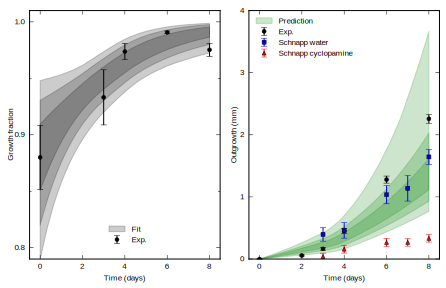

In [10]:
time = sp.array(store['time'])
gexpdata = store['gexpdata']
outgrowth_pop = store['outgrowth_pop']

condition = 'full'
  
fig, ax = plt.subplots(1, 2, sharex = True, figsize = (160.0/25.4, 104.0/25.4))
# fig.suptitle(full_title[condition], fontsize = 8)

# experimental data
ax[1].errorbar(sp.array(outgrowth_pop['time']), scale_growth * sp.array(outgrowth_pop['mean']),
               scale_growth * sp.array(outgrowth_pop['sem']),
               label = 'Exp.', fmt = 'o', color = 'black')

ax[0].errorbar(gexpdata['time'], gexpdata['G', 'mean'], gexpdata['G', 'sem'], fmt='o', color = 'black', label = 'Exp.')

# Schnapp
ax[1].errorbar(outgrowth_schnapp['time'], outgrowth_schnapp['water'], outgrowth_schnapp['water_std'],
              label = 'Schnapp water', fmt = 's', color = 'blue')
ax[1].errorbar(outgrowth_schnapp['time'], outgrowth_schnapp['cyclopamine'], outgrowth_schnapp['cyclopamine_std'],
              label = 'Schnapp cyclopamine', fmt = '^', color = 'red')

# best prediction

L = store['best_fit_{}'.format(condition)]['L']
G = store['best_fit_{}'.format(condition)]['G']

if condition == 'full':
    Glabel = 'fit'
else:
    Glabel = 'prediction'

# ax[1].plot(time, scale_growth * L, lw = 2, color = 'black', label = 'prediction')
# ax[0].plot(time, G,                  lw = 2, color = 'black', label = Glabel)

# 3-sigma confidence interval
L_3sigma_max = store['L_3sigma_max_{0}'.format(condition)]
L_3sigma_min = store['L_3sigma_min_{0}'.format(condition)]
ax[1].fill_between(time, scale_growth * L_3sigma_min, scale_growth * L_3sigma_max, alpha = 0.2, color = 'green', label = 'Prediction')

G_3sigma_max = store['G_3sigma_max_{0}'.format(condition)]
G_3sigma_min = store['G_3sigma_min_{0}'.format(condition)]
ax[0].fill_between(time, G_3sigma_min, G_3sigma_max, alpha = 0.2, color = 'black', label = 'Fit')

# 2sigma confidence interval
L_2sigma_max = store['L_2sigma_max_{0}'.format(condition)]
L_2sigma_min = store['L_2sigma_min_{0}'.format(condition)]
ax[1].fill_between(time, scale_growth * L_2sigma_min, scale_growth * L_2sigma_max, alpha = 0.2, color = 'green')

G_2sigma_max = store['G_2sigma_max_{0}'.format(condition)]
G_2sigma_min = store['G_2sigma_min_{0}'.format(condition)]
ax[0].fill_between(time, G_2sigma_min, G_2sigma_max, alpha = 0.2, color = 'black')

# 1sigma confidence interval
L_1sigma_max = store['L_1sigma_max_{0}'.format(condition)]
L_1sigma_min = store['L_1sigma_min_{0}'.format(condition)]
ax[1].fill_between(time, scale_growth * L_1sigma_min, scale_growth * L_1sigma_max, alpha = 0.2, color = 'green')

G_1sigma_max = store['G_1sigma_max_{0}'.format(condition)]
G_1sigma_min = store['G_1sigma_min_{0}'.format(condition)]
ax[0].fill_between(time, G_1sigma_min, G_1sigma_max, alpha = 0.2, color = 'black')

# formatting
fig.patch.set_alpha(1.0)

ax[1].legend(loc = 'upper left', frameon = False, numpoints = 1)
#     ax[1].plot([0.6, 2.45], 2 * [3.37], color = 'black')
ax[1].set_xlim(-0.5, 8.5)
ax[1].set_ylim(0.0, 4.0)
ax[1].set_yticks([0, 1, 2, 3, 4])

ax[0].legend(loc = (0.4, 0.05), frameon = False, numpoints = 1)
ax[0].set_yticks(sp.arange(0.7, 1.01, 0.1))
ax[0].set_yticks(sp.arange(0.75, 1.06, 0.1), minor = True)
ax[0].set_ylim(0.79, 1.01)

#     ax[1].get_yaxis().set_label_coords(-0.3, 0.5)
#     ax[0].get_yaxis().set_label_coords(-0.3, 0.5)


ax[0].set_xlabel('Time (days)')
ax[1].set_xlabel('Time (days)')
ax[1].set_ylabel('Outgrowth (mm)')
ax[0].set_ylabel('Growth fraction')
plt.tight_layout()
# plt.savefig('../../figure_plots/lg_model_{}.svg'.format(condition))

plt.show()

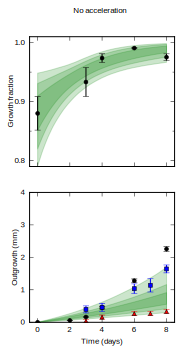

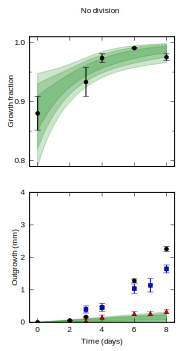

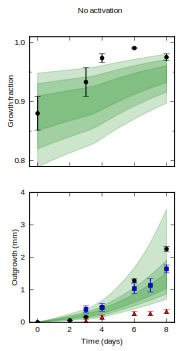

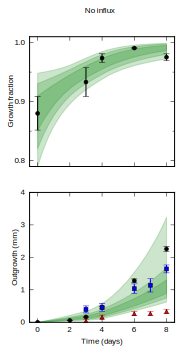

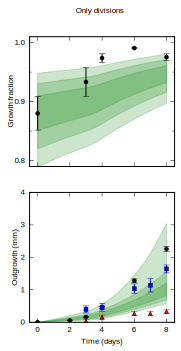

In [11]:
time = sp.array(store['time'])
gexpdata = store['gexpdata']
outgrowth_pop = store['outgrowth_pop']
conditions = list(store['conditions'])
conditions.remove('full')


for condition in conditions:

  
    fig, ax = plt.subplots(2, sharex = True, figsize = (66.0/25.4, 130.0/25.4))
    fig.suptitle(full_title[condition], fontsize = 8)

    # experimental data
    ax[1].errorbar(sp.array(outgrowth_pop['time']), scale_growth * sp.array(outgrowth_pop['mean']),
                   scale_growth * sp.array(outgrowth_pop['sem']),
                   label = '_data', fmt = 'o', color = 'black')
    
    ax[0].errorbar(gexpdata['time'], gexpdata['G', 'mean'], gexpdata['G', 'sem'], fmt='o', color = 'black', label = '_data')
    
    # Schnapp
    ax[1].errorbar(outgrowth_schnapp['time'], outgrowth_schnapp['water'], outgrowth_schnapp['water_std'],
                  label = 'Schnapp water', fmt = 's', color = 'blue')
    ax[1].errorbar(outgrowth_schnapp['time'], outgrowth_schnapp['cyclopamine'], outgrowth_schnapp['cyclopamine_std'],
                  label = 'Schnapp cyclopamine', fmt = '^', color = 'red')
    
#     # best prediction
    
#     L = store['best_fit_{}'.format(condition)]['L']
#     G = store['best_fit_{}'.format(condition)]['G']
    
#     if condition == 'full':
#         Glabel = 'fit'
#     else:
#         Glabel = 'prediction'
        
#     ax[1].plot(time, scale_growth * L, lw = 2, color = 'black', label = 'prediction')
#     ax[0].plot(time, G,                  lw = 2, color = 'black', label = Glabel)
        
    # 3-sigma confidence interval
    L_3sigma_max = store['L_3sigma_max_{0}'.format(condition)]
    L_3sigma_min = store['L_3sigma_min_{0}'.format(condition)]
    ax[1].fill_between(time, scale_growth * L_3sigma_min, scale_growth * L_3sigma_max, alpha = 0.2, color = 'green')
    
    G_3sigma_max = store['G_3sigma_max_{0}'.format(condition)]
    G_3sigma_min = store['G_3sigma_min_{0}'.format(condition)]
    ax[0].fill_between(time, G_3sigma_min, G_3sigma_max, alpha = 0.2, color = 'green')
    
    # 2sigma confidence interval
    L_2sigma_max = store['L_2sigma_max_{0}'.format(condition)]
    L_2sigma_min = store['L_2sigma_min_{0}'.format(condition)]
    ax[1].fill_between(time, scale_growth * L_2sigma_min, scale_growth * L_2sigma_max, alpha = 0.2, color = 'green')
    
    G_2sigma_max = store['G_2sigma_max_{0}'.format(condition)]
    G_2sigma_min = store['G_2sigma_min_{0}'.format(condition)]
    ax[0].fill_between(time, G_2sigma_min, G_2sigma_max, alpha = 0.2, color = 'green')
    
    # 1sigma confidence interval
    L_1sigma_max = store['L_1sigma_max_{0}'.format(condition)]
    L_1sigma_min = store['L_1sigma_min_{0}'.format(condition)]
    ax[1].fill_between(time, scale_growth * L_1sigma_min, scale_growth * L_1sigma_max, alpha = 0.2, color = 'green')
    
    G_1sigma_max = store['G_1sigma_max_{0}'.format(condition)]
    G_1sigma_min = store['G_1sigma_min_{0}'.format(condition)]
    ax[0].fill_between(time, G_1sigma_min, G_1sigma_max, alpha = 0.2, color = 'green')
    
    # formatting
    fig.patch.set_alpha(1.0)
    
#     ax[1].legend(loc = 'best', frameon = False, numpoints = 1)
#     ax[1].plot([0.6, 2.45], 2 * [3.37], color = 'black')
    ax[1].set_xlim(-0.5, 8.5)
    ax[1].set_ylim(0.0, 4.0)
    ax[1].set_yticks([0, 1, 2, 3, 4])
    
#     ax[0].legend(loc = (0.15,0.05), frameon = False, numpoints = 1)
    ax[0].set_yticks(sp.arange(0.7, 1.01, 0.1))
    ax[0].set_yticks(sp.arange(0.75, 1.06, 0.1), minor = True)
    ax[0].set_ylim(0.79, 1.01)
    
#     ax[1].get_yaxis().set_label_coords(-0.3, 0.5)
#     ax[0].get_yaxis().set_label_coords(-0.3, 0.5)
    
   
    ax[1].set_xlabel('Time (days)')
    ax[1].set_ylabel('Outgrowth (mm)')
    ax[0].set_ylabel('Growth fraction')
    
    # plt.savefig('../../figure_plots/lg_model_{}.svg'.format(condition))

    plt.show()

Visually Schnapp's and our outgrowth data do not match. Let's see if this is significant. Let's assume $N=3$ for Schnapp's data.

In [12]:
significance_schnapp = pd.DataFrame(columns=['time', 'p-value'])
for i, row in outgrowth_pop.iterrows():
    ctime = row['time']
    if len(outgrowth_schnapp.query('time == @ctime')) == 1:
        schnapp_row = outgrowth_schnapp.query('time == @ctime').iloc[0]
        significance_schnapp.loc[i] = ctime, sp.stats.ttest_ind_from_stats(row['mean'] / 1000.0, row['sem'] * sp.sqrt(8-1) / 1000.0, 8, schnapp_row['water'], schnapp_row['water_std'], 3, equal_var=False).pvalue
    else:
        continue

In [13]:
significance_schnapp

,time,p-value
2,3.0,0.053733
3,4.0,0.919536
4,6.0,0.076682
5,8.0,0.000783


## Compare with Fei et al., 2014
Fei, Ji-Feng, Maritta Schuez, Akira Tazaki, Yuka Taniguchi, Kathleen Roensch, and Elly M. Tanaka. “CRISPR-Mediated Genomic Deletion of Sox2 in the Axolotl Shows a Requirement in Spinal Cord Neural Stem Cell Amplification during Tail Regeneration.” Stem Cell Reports 3, no. 3 (September 9, 2014): 444–59. doi:10.1016/j.stemcr.2014.06.018.

In [14]:
outgrowth_fei = pd.read_hdf('../../../../data/Fei_et_al_2014/outgrowth_fei.hdf5', 'outgrowth')

In [15]:
outgrowth_fei

,time,GFP,GFP_std,GFP_N,SOX2_4,SOX2_4_std,SOX2_4_N
0,6.0,0.642052,0.04836,12.0,0.4319,0.114377,24.0


In [16]:
rescale_factor = outgrowth_pop.query('time == 6')['mean'].iloc[0] / 1000.0 / outgrowth_fei.loc[0, 'GFP']
rescale_factor

1.9912727688062486

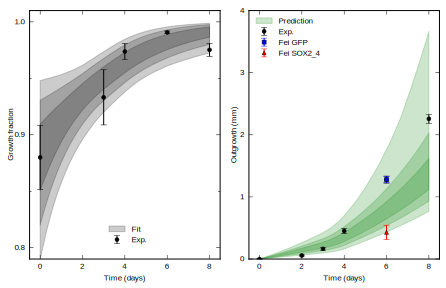

In [17]:
time = sp.array(store['time'])
gexpdata = store['gexpdata']
outgrowth_pop = store['outgrowth_pop']

condition = 'full'
  
fig, ax = plt.subplots(1, 2, sharex = True, figsize = (160.0/25.4, 104.0/25.4))
# fig.suptitle(full_title[condition], fontsize = 8)

# experimental data
ax[1].errorbar(sp.array(outgrowth_pop['time']), scale_growth * sp.array(outgrowth_pop['mean']),
               scale_growth * sp.array(outgrowth_pop['sem']),
               label = 'Exp.', fmt = 'o', color = 'black')

ax[0].errorbar(gexpdata['time'], gexpdata['G', 'mean'], gexpdata['G', 'sem'], fmt='o', color = 'black', label = 'Exp.')

# Fei
ax[1].errorbar(outgrowth_fei['time'], rescale_factor * outgrowth_fei['GFP'], outgrowth_fei['GFP_std'],
              label = 'Fei GFP', fmt = 's', color = 'blue')
ax[1].errorbar(outgrowth_fei['time'], 0.5 * rescale_factor * outgrowth_fei['SOX2_4'], outgrowth_fei['SOX2_4_std'],
              label = 'Fei SOX2_4', fmt = '^', color = 'red')

# best prediction

L = store['best_fit_{}'.format(condition)]['L']
G = store['best_fit_{}'.format(condition)]['G']

if condition == 'full':
    Glabel = 'fit'
else:
    Glabel = 'prediction'

# ax[1].plot(time, scale_growth * L, lw = 2, color = 'black', label = 'prediction')
# ax[0].plot(time, G,                  lw = 2, color = 'black', label = Glabel)

# 3-sigma confidence interval
L_3sigma_max = store['L_3sigma_max_{0}'.format(condition)]
L_3sigma_min = store['L_3sigma_min_{0}'.format(condition)]
ax[1].fill_between(time, scale_growth * L_3sigma_min, scale_growth * L_3sigma_max, alpha = 0.2, color = 'green', label = 'Prediction')

G_3sigma_max = store['G_3sigma_max_{0}'.format(condition)]
G_3sigma_min = store['G_3sigma_min_{0}'.format(condition)]
ax[0].fill_between(time, G_3sigma_min, G_3sigma_max, alpha = 0.2, color = 'black', label = 'Fit')

# 2sigma confidence interval
L_2sigma_max = store['L_2sigma_max_{0}'.format(condition)]
L_2sigma_min = store['L_2sigma_min_{0}'.format(condition)]
ax[1].fill_between(time, scale_growth * L_2sigma_min, scale_growth * L_2sigma_max, alpha = 0.2, color = 'green')

G_2sigma_max = store['G_2sigma_max_{0}'.format(condition)]
G_2sigma_min = store['G_2sigma_min_{0}'.format(condition)]
ax[0].fill_between(time, G_2sigma_min, G_2sigma_max, alpha = 0.2, color = 'black')

# 1sigma confidence interval
L_1sigma_max = store['L_1sigma_max_{0}'.format(condition)]
L_1sigma_min = store['L_1sigma_min_{0}'.format(condition)]
ax[1].fill_between(time, scale_growth * L_1sigma_min, scale_growth * L_1sigma_max, alpha = 0.2, color = 'green')

G_1sigma_max = store['G_1sigma_max_{0}'.format(condition)]
G_1sigma_min = store['G_1sigma_min_{0}'.format(condition)]
ax[0].fill_between(time, G_1sigma_min, G_1sigma_max, alpha = 0.2, color = 'black')

# formatting
fig.patch.set_alpha(1.0)

ax[1].legend(loc = 'upper left', frameon = False, numpoints = 1)
#     ax[1].plot([0.6, 2.45], 2 * [3.37], color = 'black')
ax[1].set_xlim(-0.5, 8.5)
ax[1].set_ylim(0.0, 4.0)
ax[1].set_yticks([0, 1, 2, 3, 4])

ax[0].legend(loc = (0.4, 0.05), frameon = False, numpoints = 1)
ax[0].set_yticks(sp.arange(0.7, 1.01, 0.1))
ax[0].set_yticks(sp.arange(0.75, 1.06, 0.1), minor = True)
ax[0].set_ylim(0.79, 1.01)

#     ax[1].get_yaxis().set_label_coords(-0.3, 0.5)
#     ax[0].get_yaxis().set_label_coords(-0.3, 0.5)


ax[0].set_xlabel('Time (days)')
ax[1].set_xlabel('Time (days)')
ax[1].set_ylabel('Outgrowth (mm)')
ax[0].set_ylabel('Growth fraction')
plt.tight_layout()
#plt.savefig('../../figure_plots/lg_model_{}.svg'.format(condition))

plt.show()

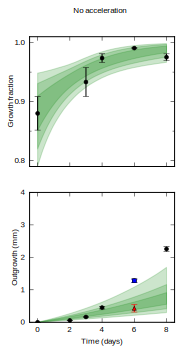

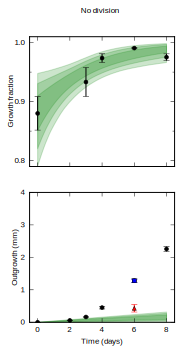

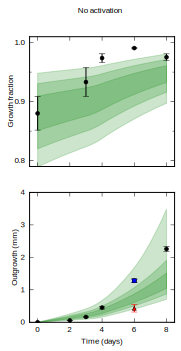

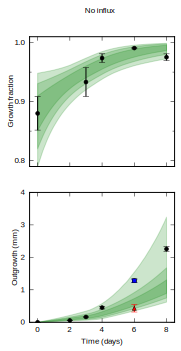

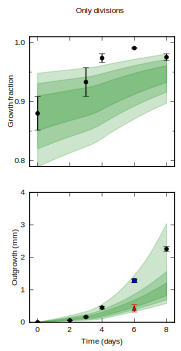

In [18]:
time = sp.array(store['time'])
gexpdata = store['gexpdata']
outgrowth_pop = store['outgrowth_pop']
conditions = list(store['conditions'])
conditions.remove('full')


for condition in conditions:

  
    fig, ax = plt.subplots(2, sharex = True, figsize = (66.0/25.4, 130.0/25.4))
    fig.suptitle(full_title[condition], fontsize = 8)

    # experimental data
    ax[1].errorbar(sp.array(outgrowth_pop['time']), scale_growth * sp.array(outgrowth_pop['mean']),
                   scale_growth * sp.array(outgrowth_pop['sem']),
                   label = '_data', fmt = 'o', color = 'black')
    
    ax[0].errorbar(gexpdata['time'], gexpdata['G', 'mean'], gexpdata['G', 'sem'], fmt='o', color = 'black', label = '_data')
    
    # Fei
    ax[1].errorbar(outgrowth_fei['time'], rescale_factor*outgrowth_fei['GFP'], outgrowth_fei['GFP_std'],
                  label = 'Fei GFP', fmt = 's', color = 'blue')
    ax[1].errorbar(outgrowth_fei['time'], 0.5 * rescale_factor*outgrowth_fei['SOX2_4'], outgrowth_fei['SOX2_4_std'],
                  label = 'Fei SOX2_4', fmt = '^', color = 'red')
    #ax[1].errorbar(outgrowth_fei['time'], outgrowth_fei['GFP'], outgrowth_fei['GFP_std'],
    #              label = 'Fei GFP', fmt = 's', color = 'blue')
    #ax[1].errorbar(outgrowth_fei['time'], outgrowth_fei['SOX2_4'], outgrowth_fei['SOX2_4_std'],
    #              label = 'Fei SOX2_4', fmt = '^', color = 'red')
    
#     # best prediction
    
#     L = store['best_fit_{}'.format(condition)]['L']
#     G = store['best_fit_{}'.format(condition)]['G']
    
#     if condition == 'full':
#         Glabel = 'fit'
#     else:
#         Glabel = 'prediction'
        
#     ax[1].plot(time, scale_growth * L, lw = 2, color = 'black', label = 'prediction')
#     ax[0].plot(time, G,                  lw = 2, color = 'black', label = Glabel)
        
    # 3-sigma confidence interval
    L_3sigma_max = store['L_3sigma_max_{0}'.format(condition)]
    L_3sigma_min = store['L_3sigma_min_{0}'.format(condition)]
    ax[1].fill_between(time, scale_growth * L_3sigma_min, scale_growth * L_3sigma_max, alpha = 0.2, color = 'green')
    
    G_3sigma_max = store['G_3sigma_max_{0}'.format(condition)]
    G_3sigma_min = store['G_3sigma_min_{0}'.format(condition)]
    ax[0].fill_between(time, G_3sigma_min, G_3sigma_max, alpha = 0.2, color = 'green')
    
    # 2sigma confidence interval
    L_2sigma_max = store['L_2sigma_max_{0}'.format(condition)]
    L_2sigma_min = store['L_2sigma_min_{0}'.format(condition)]
    ax[1].fill_between(time, scale_growth * L_2sigma_min, scale_growth * L_2sigma_max, alpha = 0.2, color = 'green')
    
    G_2sigma_max = store['G_2sigma_max_{0}'.format(condition)]
    G_2sigma_min = store['G_2sigma_min_{0}'.format(condition)]
    ax[0].fill_between(time, G_2sigma_min, G_2sigma_max, alpha = 0.2, color = 'green')
    
    # 1sigma confidence interval
    L_1sigma_max = store['L_1sigma_max_{0}'.format(condition)]
    L_1sigma_min = store['L_1sigma_min_{0}'.format(condition)]
    ax[1].fill_between(time, scale_growth * L_1sigma_min, scale_growth * L_1sigma_max, alpha = 0.2, color = 'green')
    
    G_1sigma_max = store['G_1sigma_max_{0}'.format(condition)]
    G_1sigma_min = store['G_1sigma_min_{0}'.format(condition)]
    ax[0].fill_between(time, G_1sigma_min, G_1sigma_max, alpha = 0.2, color = 'green')
    
    # formatting
    fig.patch.set_alpha(1.0)
    
#     ax[1].legend(loc = 'best', frameon = False, numpoints = 1)
#     ax[1].plot([0.6, 2.45], 2 * [3.37], color = 'black')
    ax[1].set_xlim(-0.5, 8.5)
    ax[1].set_ylim(0.0, 4.0)
    ax[1].set_yticks([0, 1, 2, 3, 4])
    
#     ax[0].legend(loc = (0.15,0.05), frameon = False, numpoints = 1)
    ax[0].set_yticks(sp.arange(0.7, 1.01, 0.1))
    ax[0].set_yticks(sp.arange(0.75, 1.06, 0.1), minor = True)
    ax[0].set_ylim(0.79, 1.01)
    
#     ax[1].get_yaxis().set_label_coords(-0.3, 0.5)
#     ax[0].get_yaxis().set_label_coords(-0.3, 0.5)
    
   
    ax[1].set_xlabel('Time (days)')
    ax[1].set_ylabel('Outgrowth (mm)')
    ax[0].set_ylabel('Growth fraction')
    
    #plt.savefig('../../figure_plots/lg_model_{}.svg'.format(condition))

    plt.show()

Visually Fei's and our outgrowth data do not match. Let's see if this is significant. Let's assume $N=3$ for Schnapp's data.

In [19]:
significance_fei = pd.DataFrame(columns=['time', 'p-value'])
for i, row in outgrowth_pop.iterrows():
    ctime = row['time']
    if len(outgrowth_fei.query('time == @ctime')) == 1:
        fei_row = outgrowth_fei.query('time == @ctime').iloc[0]
        significance_fei.loc[i] = ctime, sp.stats.ttest_ind_from_stats(row['mean'] / 1000.0, row['sem'] * sp.sqrt(8-1) / 1000.0, 8, fei_row['GFP'], fei_row['GFP_std'], fei_row['GFP_N'], equal_var=False).pvalue
    else:
        continue

In [20]:
significance_fei

,time,p-value
4,6.0,0.000003
